In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
test = pd.read_csv('test.csv')
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,Male,29,RG254,Other,X1,25,Yes,742366,No
1,CCMEWNKY,Male,43,RG268,Other,X2,49,NaN,925537,No
2,VK3KGA9M,Male,31,RG270,Salaried,X1,14,No,215949,No
3,TT8RPZVC,Male,29,RG272,Other,X1,33,No,868070,No
4,SHQZEYTZ,Female,29,RG270,Other,X1,19,No,657087,No


In [3]:
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [4]:
test.shape

(105312, 10)

In [5]:
test.isnull().sum()

ID                         0
Gender                     0
Age                        0
Region_Code                0
Occupation                 0
Channel_Code               0
Vintage                    0
Credit_Product         12522
Avg_Account_Balance        0
Is_Active                  0
dtype: int64

In [35]:
test['Credit_Product'].unique()

array(['No', nan, 'Yes'], dtype=object)

In [36]:
test['Credit_Product'].value_counts()

No     144357
Yes     72043
Name: Credit_Product, dtype: int64

#### We can clearly see that only 11% values are missing and that too in just one feature. and 'No' values ar already high.
#### Therefore, we can just replace these values by 'Yes' to balance the data and replacve the nan values.

In [9]:
test['Credit_Product'].replace(np.nan,'Yes',inplace=True)

In [10]:
test.isnull().sum()

ID                     0
Gender                 0
Age                    0
Region_Code            0
Occupation             0
Channel_Code           0
Vintage                0
Credit_Product         0
Avg_Account_Balance    0
Is_Active              0
dtype: int64

In [8]:
for feature in test[['Gender','Region_Code','Occupation','Channel_Code','Credit_Product','Is_Active']]:
    categories = test[feature].unique()
    count = len(test[feature].unique())
    print(f' Categories for {feature} are: {categories} and number of categories are {count} \n')

 Categories for Gender are: ['Male' 'Female'] and number of categories are 2 

 Categories for Region_Code are: ['RG254' 'RG268' 'RG270' 'RG272' 'RG253' 'RG257' 'RG284' 'RG283' 'RG277'
 'RG273' 'RG261' 'RG280' 'RG274' 'RG278' 'RG269' 'RG281' 'RG251' 'RG252'
 'RG279' 'RG282' 'RG262' 'RG263' 'RG264' 'RG256' 'RG265' 'RG260' 'RG258'
 'RG271' 'RG250' 'RG275' 'RG276' 'RG267' 'RG255' 'RG259' 'RG266'] and number of categories are 35 

 Categories for Occupation are: ['Other' 'Salaried' 'Self_Employed' 'Entrepreneur'] and number of categories are 4 

 Categories for Channel_Code are: ['X1' 'X2' 'X3' 'X4'] and number of categories are 4 

 Categories for Credit_Product are: ['Yes' 'No'] and number of categories are 2 

 Categories for Is_Active are: ['No' 'Yes'] and number of categories are 2 



#### Encoding categorical values for the fetaure 'Credit product' frst as it has null values. 

In [13]:
test['Credit_Product'] = test['Credit_Product'].map({'Yes':1,'No':0})

In [14]:
test.tail()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
105307,DBENJOYI,Male,52,RG268,Salaried,X2,86,1,4242558,Yes
105308,CWQ72DWS,Male,55,RG277,Other,X2,86,1,1159153,No
105309,HDESC8GU,Male,35,RG254,Salaried,X4,15,0,1703727,No
105310,2PW4SFCA,Male,53,RG254,Other,X3,93,0,737178,Yes
105311,F2NOYPPZ,Male,27,RG256,Salaried,X1,21,0,591565,No


#### Now, we will convert categorical features to numbers depending upon the feature data:
#### We will convert the features 'Gender', 'Is_Active' ,'Region code, 'Channel code' and 'Occupation'  using label encoder

In [16]:
from sklearn.preprocessing import LabelEncoder
lben = LabelEncoder()
columns = ['Gender','Is_Active','Region_Code','Channel_Code','Occupation']
for feature in columns:
    test[feature] = lben.fit_transform(test[feature])

In [17]:
test.head()

,ID,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
0,VBENBARO,1,29,4,1,0,25,1,742366,0
1,CCMEWNKY,1,43,18,1,1,49,1,925537,0
2,VK3KGA9M,1,31,20,2,0,14,0,215949,0
3,TT8RPZVC,1,29,22,1,0,33,0,868070,0
4,SHQZEYTZ,0,29,20,1,0,19,0,657087,0


#### Now all the categorical features have been changed to numerals. We can move forward with scaling the date set.

#### we will now check our data for various distributions, we will use a few features as most fetaures have 0 and 1 values and other have discrete values ranging from 0 to 3.

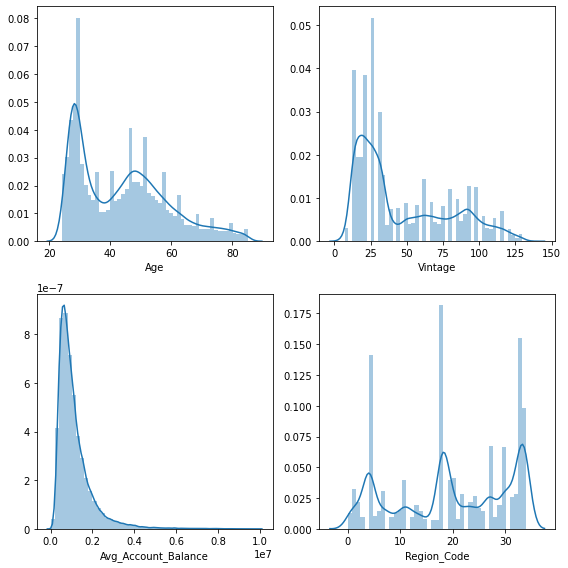

In [19]:
columns = ['Age','Vintage','Avg_Account_Balance','Region_Code']
plt.figure(figsize=(8,8))
plotnumber=1
for feature in columns:
    ax = plt.subplot(2,2,plotnumber)
    sns.distplot(test[feature])
    plt.xlabel(feature)
    plotnumber+=1
plt.tight_layout()

#### All the above plots can be considered as having left sklewed distributions except for 'Region_Code'  We can work with log transformation for the same.

In [20]:
# Copying the dataset to work with various transformations:
data_1 = test.copy()
data_2 = test.copy()
data_3 = test.copy()

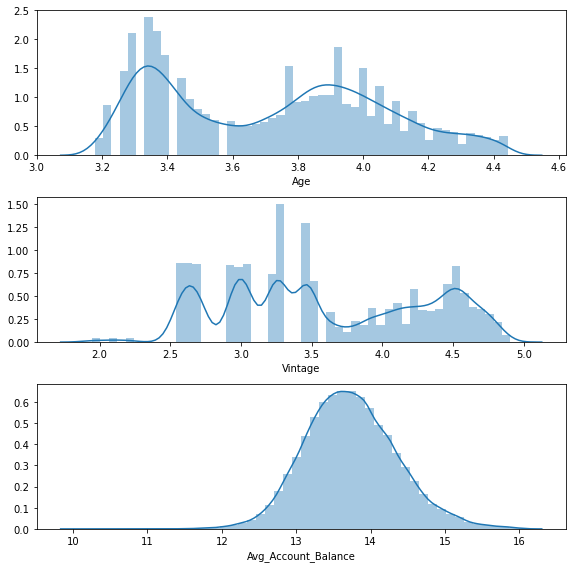

In [21]:
# Checking with log transformation:
columns = ['Age','Vintage','Avg_Account_Balance']
plt.figure(figsize=(8,8))
plotnumber=1
for feature in columns:
    ax = plt.subplot(3,1,plotnumber)
    data_1[feature] = np.log(data_1[feature])
    sns.distplot(data_1[feature])
    plt.xlabel(feature)
    plotnumber+=1
plt.tight_layout()

####  As we can see that feature 'Avg_account_balance' has been tramsformed into a nice normal distribution whereas 'Vintage' has been distorted. 'Age' has also been distorted a but not as much as 'Vintage'.

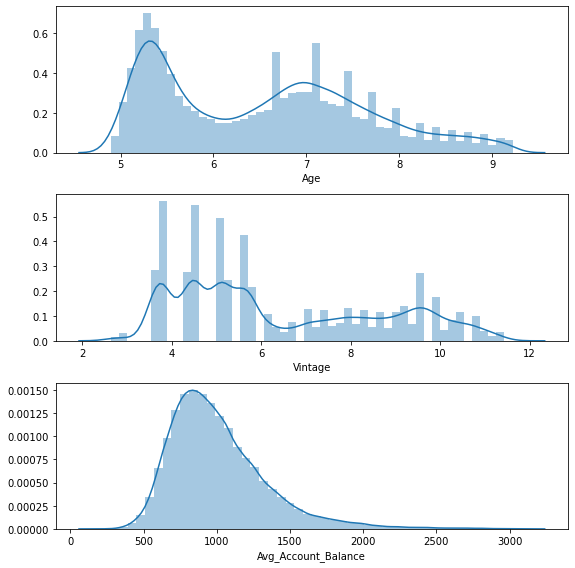

In [22]:
# Checking with square root transformation:
columns = ['Age','Vintage','Avg_Account_Balance']
plt.figure(figsize=(8,8))
plotnumber=1
for feature in columns:
    ax = plt.subplot(3,1,plotnumber)
    data_2[feature] = np.sqrt(data_2[feature])
    sns.distplot(data_2[feature])
    plt.xlabel(feature)
    plotnumber+=1
plt.tight_layout()

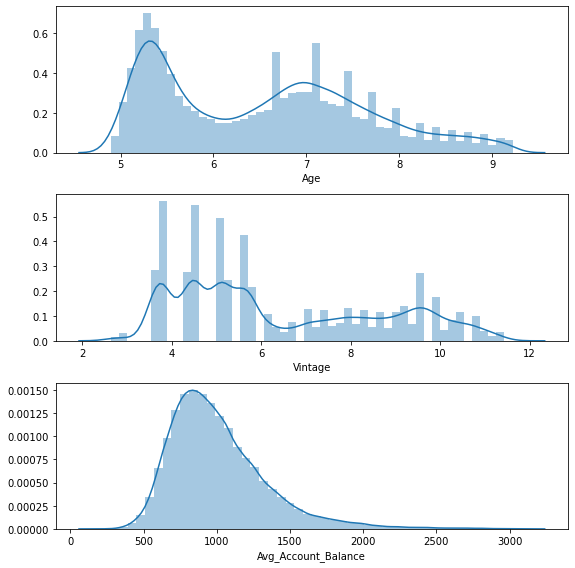

In [23]:
# Checking with Exponential transformation
columns = ['Age','Vintage','Avg_Account_Balance']
plt.figure(figsize=(8,8))
plotnumber=1
for feature in columns:
    ax = plt.subplot(3,1,plotnumber)
    data_3[feature] = data_3[feature]**(1/2)
    sns.distplot(data_3[feature])
    plt.xlabel(feature)
    plotnumber+=1
plt.tight_layout()

#### As we can see in all the above distributions, 'Age' and 'Vintage' has poor plots as compared to orginal distributions.
#### therefore, we will not use any of the above transformations for these two features and will use the original data.
#### For "Avg_account_balance". log transformation is working the best as it id giving a smooth Gaussian distribution.
#### Aslo, we wil not use Satndardisation/Normalization which I have already tried in the previous submissions because SVC and KNN take and unreasonably longer time and Logistric regression provide a very low ROC_AUC score. So, we will go with the original data and log transformation of "Avg_account_balance' as the algorithms XgBoost and LighGBM do not require scaling.

In [26]:
# Tranforming feature 'Avg_account_balance' using log transformation.
test['Avg_Account_Balance'] = np.log(test['Avg_Account_Balance'])

In [28]:
test = test.drop(columns=['ID'],axis=1)

In [29]:
test.tail()

,Gender,Age,Region_Code,Occupation,Channel_Code,Vintage,Credit_Product,Avg_Account_Balance,Is_Active
105307,1,52,18,2,1,86,1,15.260677,1
105308,1,55,27,1,1,86,1,13.963200,0
105309,1,35,4,2,3,15,0,14.348329,0
105310,1,53,4,1,2,93,0,13.510585,1
105311,1,27,6,2,0,21,0,13.290527,0


In [31]:
test.shape

(105312, 9)

In [32]:
# Exporting the test file into csv
test.to_csv('test_scaled_lben.csv',index=False)